<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/ThreeBodyTB_julia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Example of how to run [`ThreeBodyTB`](https://github.com/usnistgov/ThreeBodyTB.jl) using julia.

First we have to:

 1) install julia,

 2) reload the page, and

 3) then install `ThreeBodyTB`, which takes a while. Once things are installed, commands work reasonably quickly the second time they are run, as the machine code is cached.**

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook for ThreeBodyTB_

## Reference: https://doi.org/10.1103/PhysRevMaterials.7.044603

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

For conda based example See: https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/tb3py.ipynb

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Unrecognized magic `%%shell`.

Julia does not use the IPython `%magic` syntax.   To interact with the IJulia kernel, use `IJulia.somefunction(...)`, for example.  Julia macros, string macros, and functions can be used to accomplish most of the other functionalities of IPython magics.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [1]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, broadwell)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


#ThreeBodyTB

**Load the ThreeBodyTB code. Unfortunately this takes a while the first time, as many other packages must be downloaded for our fresh installation.**

In [2]:
using Pkg
Pkg.add(url = "https://github.com/usnistgov/ThreeBodyTB.jl", rev = "develop3")
using ThreeBodyTB
Pkg.add("Plots")
using Plots

     Cloning git-repo `https://github.com/usnistgov/ThreeBodyTB.jl`
    Updating git-repo `https://github.com/usnistgov/ThreeBodyTB.jl`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed LERC_jll ───────────────────────── v3.0.0+1
   Installed libfdk_aac_jll ─────────────────── v2.0.2+0
   Installed Libmount_jll ───────────────────── v2.40.1+0
   Installed GR_jll ─────────────────────────── v0.73.7+0
   Installed x265_jll ───────────────────────── v3.5.0+0
   Installed JpegTurbo_jll ──────────────────── v3.0.3+0
   Installed libdecor_jll ───────────────────── v0.2.2+0
   Installed OffsetArrays ───────────────────── v1.14.1
   Installed Opus_jll ───────────────────────── v1.3.2+0
   Installed Xorg_xkbcomp_jll ───────────────── v1.4.6+0
   Installed FFTW ───────────────────────────── v1.8.0
   Installed LoggingExtras ──────────────────── v1.0.3
   Installed RelocatableFolders ─────────────── v1.0.1
   Installed XMLDict ──────────────

**Define an AlP primitive unit cell (zincblende structure).**

In [3]:
# https://www.ctcms.nist.gov/~knc6/static/JARVIS-DFT/JVASP-1109.xml
pos="""Sn4S4
1.0
4.033601508001088 1e-16 0.0
0.0 4.394493698354189 0.0
0.0 0.0 11.424318648637847
Sn S
4 4
Cartesian
1.0084 1.6378941450641458 7.094661401047861
3.0252 2.756595854935855 4.329658598952143
3.0252 3.8351391450641454 10.041818598952139
1.0084 0.5593508549358553 1.3825014010478602
1.0084 0.1224744620369969 4.008692432047574
3.0252 4.272015537963004 7.415627567952426
3.0252 2.3197194620369967 1.7034675679524252
1.0084 2.074770537963003 9.720852432047574
"""
open("POSCAR","w") do file
write(file,string(pos))
end
c = makecrys("POSCAR")

Units: Å

A1=     4.03360  0.00000  0.00000
A2=     0.00000  4.39450  0.00000
A3=     0.00000  0.00000  11.42432

Sn   0.25000  0.37272  0.62101
Sn   0.75000  0.62728  0.37899
Sn   0.75000  0.87272  0.87899
Sn   0.25000  0.12728  0.12101
S    0.25000  0.02787  0.35089
S    0.75000  0.97213  0.64911
S    0.75000  0.52787  0.14911
S    0.25000  0.47213  0.85089


In [4]:
A = [0 2.73 2.73; 2.73 0 2.73; 2.73 2.73 0] #angstrom lattice vectors
pos = [0 0 0; 0.25 0.25 0.25]               #crystal coordinates
atoms = ["Al", "P"]                         #strings or symbols are fine

c = makecrys(A, pos, atoms)

Units: Å

A1=     0.00000  2.73000  2.73000
A2=     2.73000  0.00000  2.73000
A3=     2.73000  2.73000  0.00000

Al   0.00000  0.00000  0.00000
P    0.25000  0.25000  0.25000


**Create a 2x2x2 supercell, use the simple plotter for fun.**

s P blue
s Al orange


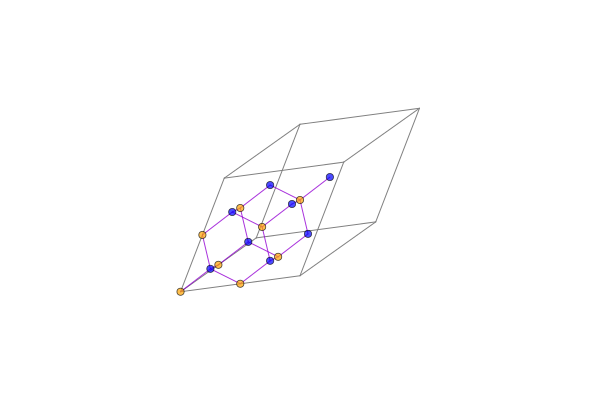

In [ ]:
c222 = c * [2,2,2]
plot(c222)

**Calculate energy of AlP**

In [5]:
energy, tbc, flag = scf_energy(c);


found /root/.julia/packages/ThreeBodyTB/YQw1U/src/../dats/pbesol/v1.3/els/coef.el.2bdy.P.xml.gz
Tuple{Symbol, Symbol}
found /root/.julia/packages/ThreeBodyTB/YQw1U/src/../dats/pbesol/v1.3/els/coef.el.3bdy.P.xml.gz
found /root/.julia/packages/ThreeBodyTB/YQw1U/src/../dats/pbesol/v1.3/binary/coef.el.2bdy.Al.P.xml.gz
Tuple{Symbol, Symbol}
Tuple{Symbol, Symbol}
found /root/.julia/packages/ThreeBodyTB/YQw1U/src/../dats/pbesol/v1.3/binary/coef.el.3bdy.Al.P.xml.gz
found /root/.julia/packages/ThreeBodyTB/YQw1U/src/../dats/pbesol/v1.3/els/coef.el.2bdy.Al.xml.gz
Tuple{Symbol, Symbol}
found /root/.julia/packages/ThreeBodyTB/YQw1U/src/../dats/pbesol/v1.3/els/coef.el.3bdy.Al.xml.gz


START SCF ----------------
SCF CALC 0001 energy  -10.85101555    
SCF CALC 0002 energy  -10.81197415  en_diff:   3.904139E-02  dq_diff:   8.240624E-01   mix: 4.000000E-01 
SCF CALC 0003 energy  -10.77989818  en_diff:   3.207597E-02  dq_diff:   4.522777E-01   mix: 4.000000E-01 
SCF CALC 0004 energy  -10.75822860  en_di

In [6]:
ind2orb, orb2ind, etotal, nval = ThreeBodyTB.CrystalMod.orbital_index(c)

(Dict{Any, Any}(5 => Any[2, :P, :s], 4 => Any[1, :Al, :py], 6 => Any[2, :P, :pz], 7 => Any[2, :P, :px], 2 => Any[1, :Al, :pz], 8 => Any[2, :P, :py], 3 => Any[1, :Al, :px], 1 => Any[1, :Al, :s]), Dict{Any, Any}(2 => 5:8, 1 => 1:4), -21.44734287, 8.0)

In [9]:
ind2orb

Dict{Any, Any} with 8 entries:
  5 => Any[2, :P, :s]
  4 => Any[1, :Al, :py]
  6 => Any[2, :P, :pz]
  7 => Any[2, :P, :px]
  2 => Any[1, :Al, :pz]
  8 => Any[2, :P, :py]
  3 => Any[1, :Al, :px]
  1 => Any[1, :Al, :s]

In [10]:
orb2ind

Dict{Any, Any} with 2 entries:
  2 => 5:8
  1 => 1:4

In [11]:
etotal

-21.44734287

In [12]:
nval

8.0

In [19]:

ind2orb, orb2ind, etotal, nval = ThreeBodyTB.CrystalMod.orbital_index(c)

d = Dict{Tuple{Int, Int, Int, Int, Int, Int, Int, Int, Int}, Tuple{Float64, Float64}}()

for i in 1:tbc.tb.nwan
    for j in 1:tbc.tb.nwan
        for nr in 1:tbc.tb.nr
            a1, t1, s1 = ind2orb[i]
            a2, t2, s2 = ind2orb[j]
            r = tbc.tb.ind_arr[nr, :]

            d[(a1-1, t1, s1, a2-1, t2, s2, r[1], r[2], r[3])] = (tbc.tb.H[i, j, nr] * 13.605662285137, tbc.tb.S[i, j, nr])
        end
    end
end

LoadError: MethodError: [0mCannot `convert` an object of type [92mSymbol[39m[0m to an object of type [91mInt64[39m
[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::Gray24[39m) where T<:Real at ~/.julia/packages/ColorTypes/vpFgh/src/conversions.jl:114
[0m  convert(::Type{T}, [91m::Gray[39m) where T<:Real at ~/.julia/packages/ColorTypes/vpFgh/src/conversions.jl:113
[0m  convert(::Type{T}, [91m::Base.TwicePrecision[39m) where T<:Number at twiceprecision.jl:273
[0m  ...

**The `tbc` object contains information on the SCF Hamiltonian, band structure, etc, for plotting purposes, etc.**

In [ ]:
tbc


tb_crys object (DENSE)

Units: Å

A1=     0.00000  2.73000  2.73000
A2=     2.73000  0.00000  2.73000
A3=     2.73000  2.73000  0.00000

Al   0.00000  0.00000  0.00000
P    0.25000  0.25000  0.25000


nelec: 8.0; nspin (hoppings): 1
within_fit: true  ; scf: true; scfspin: false
calculated energy: -10.728 eV
formation energy: -0.628 eV
efermi  : -1.251 eV
charges : [-0.84, 0.84]


tight binding real space object (DENSE); nwan = 8, nr = 99, nonorth = true, scf = true, scfmagnetic = false, nspin = 1





Write the wannier90_hr.dat format file for tbc object.

In [ ]:
write_hr_dat(tbc,filename="my_hr.dat")

grid: [10, 10, 10]
  0.007534 seconds (12.80 k allocations: 4.869 MiB)
  8.070477 seconds (32.63 M allocations: 2.280 GiB, 12.00% gc time, 23.37% compilation time)
start write ./my_hr.dat
wrote  ./my_hr.dat
 32.793008 seconds (73.95 M allocations: 4.129 GiB, 6.94% gc time, 79.16% compilation time)


In [ ]:
println(readdir())

[".config", "POSCAR", "my_hr.dat", "sample_data"]


In [ ]:
println("directgap, indirectgap, gaptype, bandwidth",string(ThreeBodyTB.BandStruct.band_summary(tbc)))

using kgrid [8, 8, 4]
directgap, indirectgap, gaptype, bandwidth(1.1343580062045882, 0.6989805320623194, :indirect, 13.650057267504023)


In [ ]:
#vects, vals, hk, sk, vals0 = ThreeBodyTB.TB.Hk(tbc,[.5,.5,0])

In [ ]:
#using LinearAlgebra
#abs.(vects^2)

In [ ]:
#using Plots
#heatmap(abs.(vects^2), color = :greys)

**Now we can plot the band structure and DOS**

Symmetry info
Space group # 62     Pnma      -P 2ac 2n
Point group   mmm
spg 62 Pnma P
21.589 7.622 8.304  |  90.0 90.0 90.0
need to rerun in standard structure for symmetry
calc tb
DO CLASSICAL true

START SCF ----------------
SCF CALC 0001 energy  -36.42716677    
SCF CALC 0002 energy  -36.42715825  en_diff:   8.517569E-06  dq_diff:   2.644200E-04   mix: 1.000000E+00 

YES convergence in 2 iters, energy -36.42715825165702 eV  
END SCF ------------------

ΔQ = [-0.46, -0.46, -0.46, -0.46, 0.46, 0.46, 0.46, 0.46]

align fermi -0.23928810074255694 -------------------------
no display
grid [6, 13, 13]
dos fermi -0.23658050818398535 xxxxxxxxxxxxx---------------
nspin 1
Projection type: atomic
PROJ
("Sn", [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 16)
("S", [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], 16)
proj_inds [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
proj_inds [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
(1014, 32, 

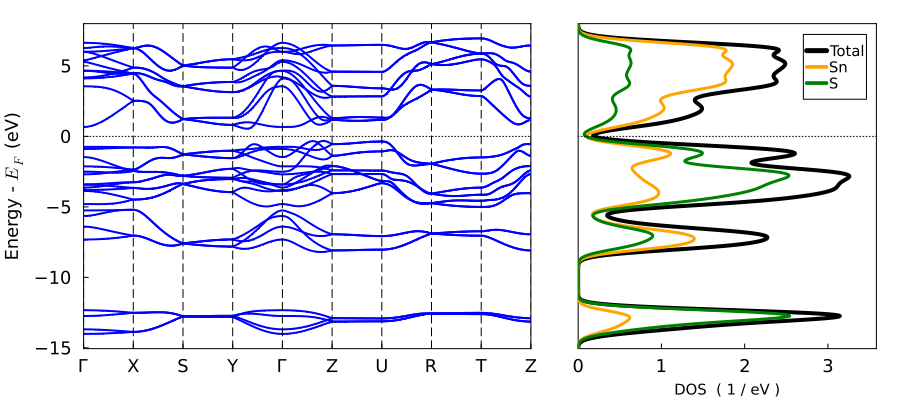

In [ ]:
tbc_new, plot_object = plot_bandstr_dos(tbc);

**Calculate energy, force, and stress**

In [ ]:
energy, force, stress, tbc = scf_energy_force_stress(tbc);


Calculate Force, Stress (no scf)
DO CLASSICAL true

START SCF ----------------
SCF CALC 0001 energy  -10.90639632    
SCF CALC 0002 energy  -10.90639019  en_diff:   6.130664E-06  dq_diff:   8.202471E-04   mix: 1.000000E+00 

YES convergence in 2 iters, energy -10.906390188801593 eV  
END SCF ------------------

ΔQ = [-0.82, 0.82]

(Pre-)Calculate Jacobian of TB object
  0.024041 seconds (27.15 k allocations: 27.926 MiB)
Calculate Force / Stress
  0.020700 seconds (259.13 k allocations: 21.244 MiB)
  0.017272 seconds (244.97 k allocations: 14.920 MiB)
  0.011013 seconds (155.76 k allocations: 9.487 MiB)
done
----

Formation energy: -0.717 eV/atom

Lattice Vectors                       | Stress
-----------------------------------------------------------------------
A1=     +0.00000  +2.72157  +2.72157  |  +0.02835  +0.00000  +0.00000
A2=     +2.72157  +0.00000  +2.72157  |  +0.00000  +0.02835  +0.00000
A3=     +2.72157  +2.72157  +0.00000  |  +0.00000  +0.00000  +0.02835

Crystal coords

**We can also do a relaxation of the forces and stresses. We will expand the starting crystal by 10% so there is something to relax.**

In [ ]:
cfinal, tbc, energy, force, stress = relax_structure(c * 1.1 );

  0.008176 seconds (43.98 k allocations: 1.541 MiB)
DO CLASSICAL true

START SCF ----------------
SCF CALC 0001 energy  -10.41948519    
SCF CALC 0002 energy  -10.41873597  en_diff:   7.492193E-04  dq_diff:   1.727807E+00   mix: 1.000000E+00 
SCF CALC 0003 energy  -10.41718817  en_diff:   1.547804E-03  dq_diff:   1.642638E+00   mix: 1.000000E+00 
SCF CALC 0004 energy  -10.22462507  en_diff:   1.925631E-01  dq_diff:   9.992915E-03   mix: 1.000000E+00 
SCF CALC 0005 energy  -10.22319628  en_diff:   1.428792E-03  dq_diff:   3.282020E-03   mix: 1.000000E+00 
SCF CALC 0006 energy  -10.22249488  en_diff:   7.013986E-04  dq_diff:   3.467126E-06   mix: 1.000000E+00 
SCF CALC 0007 energy  -10.22249587  en_diff:   9.953398E-07  dq_diff:   1.191102E-06   mix: 1.000000E+00 

YES convergence in 7 iters, energy -10.222495871893637 eV  
END SCF ------------------

ΔQ = [-0.74, 0.74]

starting vec 
[0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Conj Grad START
  0.007301 seconds (43

**This static image shows a direct comparison of the band structure to DFT. We cannot reproduce it as part of this exercise because colab doesn't have Quantum Espresso installed.** The command required is

```
kpts, names, c_std = ThreeBodyTB.Symmetry.get_kpath_sym(c);
ThreeBodyTB.BandStruct.run_dft_compare(tbc, nprocs=2, kpath=kpts, names=names);
```



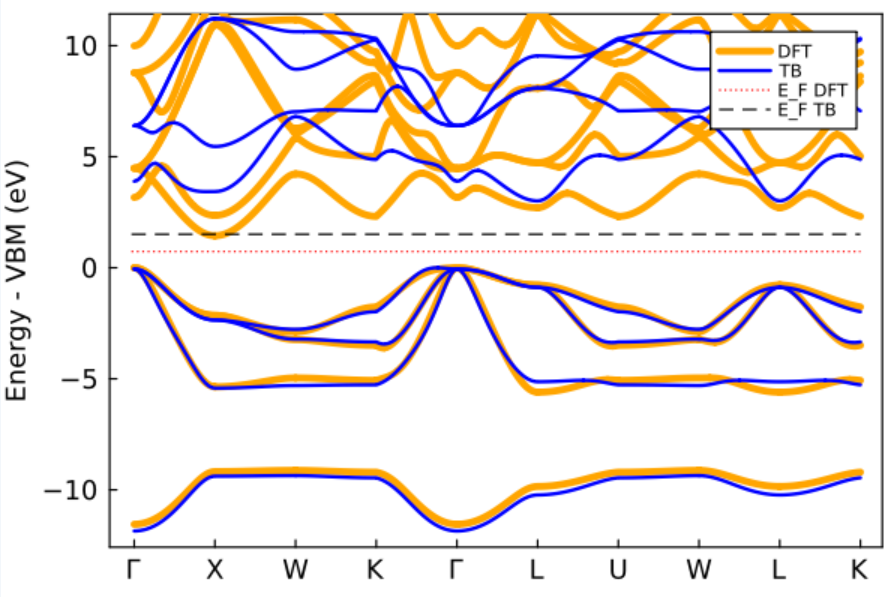

**We can calculate the energy of the 2x2x2 cell and compare to our primitive calculation**

In [ ]:
energy222, tbc222, flag222 = scf_energy(c222);
println()
println("Energy ratio ", energy222/energy)



  0.065525 seconds (526.02 k allocations: 18.213 MiB)
DO CLASSICAL true

START SCF ----------------
SCF CALC 0001 energy  -88.18921920    
SCF CALC 0002 energy  -88.18622991  en_diff:   2.989287E-03  dq_diff:   1.395274E+01   mix: 1.000000E+00 
SCF CALC 0003 energy  -88.18001109  en_diff:   6.218827E-03  dq_diff:   1.332511E+01   mix: 1.000000E+00 
SCF CALC 0004 energy  -87.24710123  en_diff:   9.329099E-01  dq_diff:   2.169395E-02   mix: 1.000000E+00 
SCF CALC 0005 energy  -87.24521672  en_diff:   1.884514E-03  dq_diff:   6.929644E-03   mix: 1.000000E+00 

YES convergence in 5 iters, energy -87.24521671639607 eV  
END SCF ------------------

ΔQ = [-0.82, 0.82, -0.82, 0.82, -0.82, 0.82, -0.82, 0.82, -0.82, 0.82, -0.82, 0.82, -0.82, 0.82, -0.82, 0.82]

scf_energy success, done

Formation energy: -0.717 eV/atom


Energy ratio 7.999531578591496


**Feel free to try your own structures. Also note, we can load crystal structures from POSCAR strings or POSCAR or QE filenames**

In [ ]:
POSCAR = """title kfg
1.0000000
0.0  5.0  5.0
5.0  0.0  5.0
5.0  5.0  0.0
Na Cl
1 1
Direct
0.0  0.0 0.0
0.5  0.5 0.5"""

ct = makecrys(POSCAR)

newlines found, interpret as string containing file instead of filename


Units: Å

A1=     0.00000  5.00000  5.00000
A2=     5.00000  0.00000  5.00000
A3=     5.00000  5.00000  0.00000

Na   0.00000  0.00000  0.00000
Cl   0.50000  0.50000  0.50000
